**To Do Now:**
1. Fix multivariable linear regression
2. Implementing multivariable Polynomial Regression
3. Explain how `df.corr` work?
4. Explain about this (https://www.kaggle.com/code/alexisbcook/cross-validation)
5. r2 score

###Note: 

This project is based on this project (https://www.kaggle.com/code/tolgahancepel/boston-housing-regression-analysis/notebook). The purpose of this project is to learn machine learning algorithms and techniques base on other people's data science project.

The goal of this project (https://www.kaggle.com/code/tolgahancepel/boston-housing-regression-analysis/notebook) is to compare the accuracy of different machine learning algorithms include
1. Linear Regression
2. Polynomial Regression - 2nd degree
3. Ridge Regression
4. Lasso Regression
5. Support Vector Regression
6. Decision Tree Regression
7. Random Forest Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Step 1, Import data and library

**Note:** In this project, I will only use those libraries, in order to practice machine learning skill.
* `from google.colab import drive`
* `import math`
* `import pandas as pd`
* `import numpy as np`
* `import matplotlib.pyplot as plt`

###Step 1.1, Import data and library.

**About Dataset:**

Concerns housing values in suburbs of Boston. (a city in Northeastern United States)

**Note**
* Number of Instances: 506
* Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.
* Missing Attribute Values: None.

**Attribute Information:**
* `df.columns[0]=` CRIM = crime rate by town
* `df.columns[1]=` ZN = proportion of residential land zoned for lots over
25,000 sq.ft.
* `df.columns[2]=` INDUS = proportion of non-retail business acres per town
* `df.columns[3]=` CHAS = Charles River dummy variable (= 1 if tract bounds
river; 0 otherwise)
* `df.columns[4]=` NOX = nitric oxides concentration (parts per 10 million)
* `df.columns[5]=` RM = average number of rooms per dwelling
* `df.columns[6]=` AGE = proportion of owner-occupied units built prior to 1940
* `df.columns[7]=` DIS = weighted distances to five Boston employment centres
* `df.columns[8]=` RAD = index of accessibility to radial highways
* `df.columns[9]=` TAX = full-value property-tax rate per \$10,000
* `df.columns[10]=` PTRATIO = pupil-teacher ratio by town
* `df.columns[11]=` B = $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks
by town
* `df.columns[12]=` LSTAT = % lower status of the population
* `df.columns[13]=` MEDV = Median value of owner-occupied homes in \$1000's

**Keyword**
* residential (ADJ) = designed for people to live in.
* non-retail business (N) = a business, including an office, warehouse, or other space that does not sell or provide goods or services directly to the ultimate consumer or user.
* tract bounds = the boundaries or limits of a tract of land especially as described by reference to lines and distances between points on the land.
* tract (N) = an area of indefinite extent, typically a large one.
* dummy variable (N) = a variable that takes the values 0 or 1 to indicate the absence or presence of some categorical effect
* dwelling (N) = a house, apartment, or other place of residence.
* prior (ADJ) = existing or coming before in time, order, or importance.
* occupied (ADJ) = (of a building, seat, etc.) being used by someone.
* The weighted arithmetic mean is similar to an ordinary arithmetic mean (the most common type of average), except that instead of each of the data points contributing equally to the final average, some data points contribute more than others. (https://en.wikipedia.org/wiki/Weighted_arithmetic_mean)
* weighted distances = The distance-weighted mean is *a measure of central tendency*, a special case of weighted mean, where weighting coefficient for each data point is computed as the inverse sum of distances between this data point and the other data points[1]. Thus, central observations in a dataset get the highest weights, while values in the tails of a distribution are downweighted. *In other words, data points close to other data points carry more weight than isolated datapoints.* (https://encyclopediaofmath.org/wiki/Distance-weighted_mean)
* Radial highway = a highway leading to or from an urban center.
* pupil = a student in school.
* Median (ADJ) = denoting or relating to a value or quantity lying at the midpoint of a frequency distribution of observed values or quantities

Source of the data set: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

In [ ]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path='/content/drive/MyDrive/Data-Science-Documentation/DataSet/K_RealEstate01_ArslanAli.csv'

df = pd.read_csv(path)
df.astype(float)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


###Step 1.2, Organize (clean) data

**How Is a Missing Value Represented in a Dataset?**
* `NaN # not a number`

**Types of Missing Values**
1. Missing Completely At Random (MCAR)
* The probability of data being missing is the same for all the observations. 
* The statistical analysis remains unbiased.
* e.g. Someone forgetting to type in the values.
2. Missing At Random (MAR)
* There is some relationship between the missing data and other values/data. 
* The statistical analysis might result in bias. Getting an unbiased estimate of the parameters can be done only by modeling the missing data.
* e.g. Most of the females don’t want to reveal their age during the survey.
3. Missing Not At Random (MNAR)
* There is some structure/pattern in missing data and other observed data can not explain it
* e.g. People having less income may refuse to share some information in a survey or questionnaire.

**Why Do We Need to Care About Handling Missing Data?**
* Many machine learning algorithms fail if the dataset contains missing values. However, algorithms like K-nearest and Naive Bayes support data with missing values.
* You may end up building a biased machine learning model, leading to incorrect results if the missing values are not handled properly.
* Missing data can lead to a lack of precision in the statistical analysis.

**There are 2 main methods on how to deal with missing value?**
1. imputation (reasonable guesses) missing data
* Replacing with an arbitrary value, the mean, the mode, the median or the previous/next value.
2. remove the missing data
* remove some rows and/or columns

reference:
* https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

**Other related information.**
* How to diagnose the missing data mechanism? (https://www.theanalysisfactor.com/missing-data-mechanism/)
* How to select row with missing value? (https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values)

**Check if there are missing values.**
* In this case, there are only 5 missing rows and a column out of 511 rows and 14 columns. For the simplicity, I will fill the missing value with its mean value.

In [ ]:
print(df.shape)

(511, 14)


In [ ]:
'''
# This code selects only rows with missing value
null_data = df[df.isnull().any(axis=1)]
print(null_data)
# reference: https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values
'''

# This code counts number of all missing values from each columns.
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# This code replace missing value of a columns into its mean value.
df['RM'].fillna(df['RM'].mean(), inplace=True)
# reference: https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns

**Note**
* In this case, there are only 5 missing value, therefore I will replace

#Step 2, Visualize the data

###Step 2.1 Visualize Standard Deriation of the data.

**(1.) Plot and view the data**

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

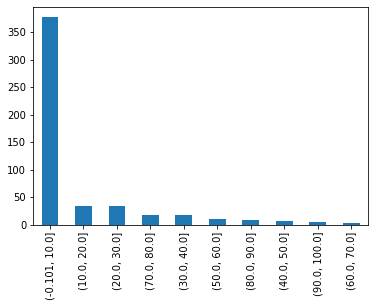

In [ ]:
# This code count the frequency of value
# x axis = value (value of the data)
# y axis = fequency (how often the data have the same value)

space=10
name='ZN'
df[name].value_counts(bins=space)

fig, ax = plt.subplots()
df[name].value_counts(bins=space).plot(ax=ax, kind='bar')

In [ ]:
print('This code indicate the general information about the particular column')
name='ZN'
print(df[name].describe())


'''print('This code show mean and Standard Deviation of every column')
for i in df.columns:
  print('column name = '+str(i))
  print('mean = '+str(df[i].mean()))
  print('std = '+str(df[i].std()))'''


This code indicate the general information about the particular column
count    511.000000
mean      11.252446
std       23.234838
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64


"print('This code show mean and Standard Deviation of every column')\nfor i in df.columns:\n  print('column name = '+str(i))\n  print('mean = '+str(df[i].mean()))\n  print('std = '+str(df[i].std()))"

**What is StandardDeriation?**

* A standard deviation (or σ) = a measure of how dispersed the data is in relation to the mean. (Read "StandardDeviation.ipynb" for more detail.)

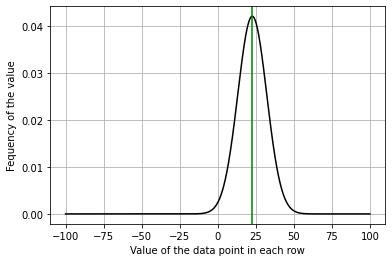

In [ ]:
def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/Data.std(),2)))/(math.sqrt(np.pi*2)*Data.std())
  return [XLine,YLine]

name=df.columns[-1]
fx=BellCurve(df[name])

plt.plot(fx[0],fx[1],color='black')
#plt.axvline(df[name].mean()-0.675*StandardDeviation(df[name]),color='red') # reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
plt.axvline(df[name].mean(),color='green')
#plt.axvline(df[name].mean()+0.675*StandardDeviation(df[name]),color='blue') # reference: https://www.statology.org/find-quartiles-with-mean-standard-deviation/
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

###Step 2.1 Visualize Correlation between different groups of data.

In [ ]:
print(df.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.198451  0.405524 -0.054906  0.420524 -0.220194  0.350847   
ZN      -0.198451  1.000000 -0.534106 -0.041333 -0.516256  0.307493 -0.567796   
INDUS    0.405524 -0.534106  1.000000  0.062332  0.763583 -0.390061  0.642817   
CHAS    -0.054906 -0.041333  0.062332  1.000000  0.091023  0.089919  0.085814   
NOX      0.420524 -0.516256  0.763583  0.091023  1.000000 -0.301079  0.729233   
RM      -0.220194  0.307493 -0.390061  0.089919 -0.301079  1.000000 -0.236693   
AGE      0.350847 -0.567796  0.642817  0.085814  0.729233 -0.236693  1.000000   
DIS     -0.377028  0.665185 -0.707886 -0.097541 -0.768309  0.198635 -0.745097   
RAD      0.625964 -0.307146  0.591784 -0.005343  0.609343 -0.212719  0.452229   
TAX      0.583389 -0.311531  0.718764 -0.034244  0.666982 -0.293359  0.503360   
PTRATIO  0.276695 -0.392844  0.379441 -0.124415  0.186073 -0.338351  0.258251   
B       -0.384356  0.175637 

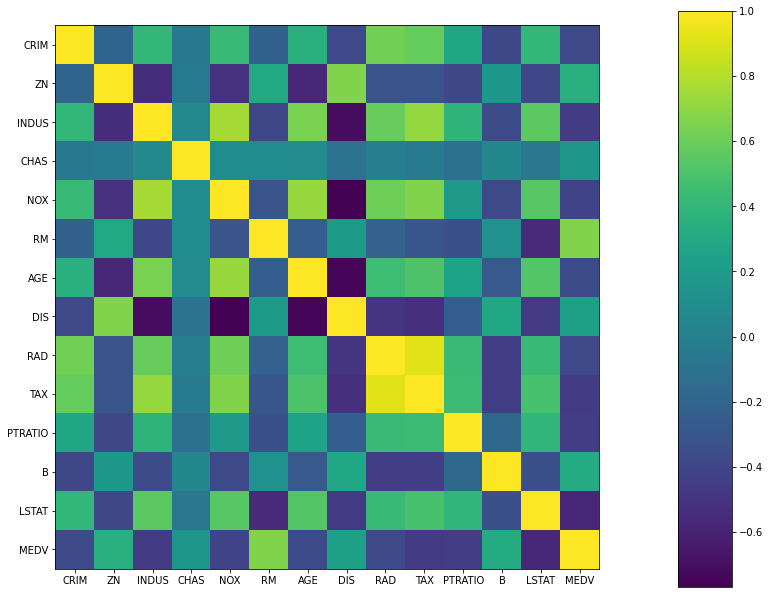

In [ ]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))

plt.imshow(corr,interpolation='nearest')

plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)

cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

plt.show()

#Step 3, Choose the Machine Learning Algorithms

###Step 3.1, Seperate Training and Testing data

In [ ]:
def SeparateData(data,Ratio,intY):
  name=data.columns[intY]

  DataRatio = int(data.shape[0]*Ratio)
  Data=data.sample(frac = 1)
  TrainD= Data.iloc[:DataRatio]
  TesttD= Data.iloc[DataRatio:]

  TrainX=TrainD.drop(name, axis=1)
  TrainY=TrainD[name]
  TesttX=TesttD.drop(name, axis=1)
  TesttY=TesttD[name]
  return [TrainX,TrainY,TesttX,TesttY]

DataD=SeparateData(df,0.75,-1)
TrainX=DataD[0]
TrainY=DataD[1]
TesttX=DataD[2]
TesttY=DataD[3]

#print('df = '+str(df.shape))
#print('TrainX = '+str(TrainX.shape))
#print('TrainY = '+str(TrainY.shape))
#print('TesttX = '+str(TesttX.shape))
#print('TesttY = '+str(TesttY.shape))

Reference:
* https://www.kaggle.com/code/alexisbcook/cross-validation

###Step 3.2 Linear Regression

In [ ]:
'''
name00=df.columns[2]
name01=df.columns[1]

#def LinearRegression_Hypothesis():

def LineR_Evaluation(data,Vector):
  sigma =0
  for i in range(data.shape[0]):
    sigma +=pow((data[0]*Vector[1]+Vector[0]-data[1]),2)
  return (1/(2*data.shape[0]))*sigma

def LineR_DiffEvaluation(data,Vector):
  res = Vector[1] * data[0] + Vector[0] - data[1]
  return [res.mean(),(res*data[0]).mean()]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(data,Diff,LRate=0.008,Decay=0.0002,InitialVector=[0.5,0.5],LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Vector=np.array(InitialVector)
  while epoch<LastEpoch or np.all(np.abs(Diff(data,Vector))<=AcceptError):
    print(Vector)
    Vector-=LRate*pow((1-Decay),epoch)*np.array(Diff(data,Vector))
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return list(Vector)

h_i=GradientDescent([df[name00], df[name01]],LineR_DiffEvaluation)
print(h_i)
'''

**Keyword**
* Epoch = a single full iteration of the algorithm over the training data. (https://medium.com/@niitwork0921/what-is-epoch-in-machine-learning-1062064d42d6)

**What is linear Regression?**

Linear regression is a machine learning model which is used for predicting the relationship between value x and value y, based on the given data on the graph.

**Hypothesis (Data Prediction) Function of Linear Regression**
* $h(\vec{x})=\vec{h}\cdot\vec{x}, x_0=1$

**Evaluation Function of Linear Regression**
* $J(\vec{h})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$
* $\frac{\partial}{\partial h_j}J(\vec{h})=\frac{1}{m}[\sum_{i=1}^m(h(\vec{x_j})-y_i)*x_j]$

**GradientDescent (Accuracy Optimize Function)**
* $h_{i} := h_{i}-a*\frac{\partial }{\partial h_{i}}J(\vec{h})$

**Given that (A)**
* $\vec{h}\in\mathbb{R^{n+1}}$
* $X\in\mathbb{R^{m\times n}}$
* $[X+\vec{1}]\in\mathbb{R^{m\times n+1}},\vec{1}\in\mathbb{R^m}$
* $[X+\vec{1}]=$ add vector that contains only $1$ into $X$ as the new column of $X$
* $[X+\vec{1}]^T\in\mathbb{R^{n+1\times m}}$
* $\vec{h}*[X+\vec{1}]^T\in\mathbb{R^{}}$

**Hypothesis (Data Prediction) Function of Linear Regression**
* $h(\vec{x})=\vec{h}\cdot\vec{x}, x_0=1$

**Evaluation Function of Linear Regression**
* $J(\vec{h})=\frac{1}{2m}\sum_{i=1}^m(h(x_i)-y_i)^2$
* $\frac{\partial }{\partial h_{i}}J(\vec{h})=\frac{1}{m}*\Sigma_{i=0}^m(hx_i-y_i)*x_i$

**GradientDescent (Accuracy Optimize Function)**
* $h_{i} := h_{i}-a*\frac{\partial }{\partial h_{i}}J(\vec{h})$

**Matrix Multiplication**

$R\times C=P$

$\vec{r_i}\cdot\vec{c_j}=p_{i,j}$

* $R\in\mathbb{R^{n\times m}}$
* $C\in\mathbb{R^{m\times q}}$
* $P\in\mathbb{R^{n\times q}}$
* $\vec{r_i}=$ row vector inside $R$ no.$i$
* $\vec{c_j}=$ column vector inside $R$ no.$j$
* $i,j\in\mathbb{Z}$
* $i\in[1,n]$
* $j\in[1,p]$

reference: https://www.mathsisfun.com/algebra/matrix-multiplying.html

**Given that (B)**
* $h(x)=\vec{h}\cdot\vec{x}+h_0$
* $\vec{h},\vec{x}\in\mathbb{R^n}$
* $\vec{h}=$ `Coef_Vect`
* $h_0=$ `Inte_Cons`
* $X\in\mathbb{R^{m\times n}}$
* $\frac{\partial }{\partial h_{i}}J(\vec{h})=$ `LineR_DiffEvaluation(dX,dY,Vector)`
* `LineR_DiffEvaluation(dX,dY,Vector)[0]` $\in\mathbb{R}$
* `LineR_DiffEvaluation(dX,dY,Vector)[1]` $\in\mathbb{R^n}$

**Evaluation Function in linear algebra from**

$J(\vec{h}_n)=\frac{1}{m}(X_{m\times n}\cdot\vec{h}_n+\vec{h}_{\{0\},m}-\vec{y}_m)^2\cdot\vec{1}_m$

**Given that (B.1)**
* $h(x)=\vec{h}\cdot\vec{x_n}+h_0$
* $\vec{h},\vec{x_n}\in\mathbb{R^n}$
* $\vec{h}=$ `Coef_Vect`
* $h_0=$ `Inte_Cons`
* $X\in\mathbb{R^{m\times n}}$
* $\vec{h_0},\vec{y},X*\vec{h}\in\mathbb{R^m}$
* `DeltaH=` $X*\vec{h}+\vec{h_0}-\vec{y}$
* `LineR_DiffEvaluation(dX,dY,Coef,Inte): return [[DeltaH.mean()],[(DeltaH*` $\vec{x_1}$ `).mean(),...,(DeltaH*` $\vec{x_n}$ `).mean()]]` = $\frac{1}{m}*[X_{m\times n}\,\,\,\vec{1}]_{m\times n+1}*(X_{m\times n}*\vec{h}_{n}+\vec{h}_{\{0\}, m}-\vec{y}_m)$

In [ ]:
name00=df.columns[2]
name01=df.columns[1]

def LineR_Evaluation(dX,dY,Vector):
  sigma =0
  for i in range(dY.shape[0]):
    sigma +=pow((dX*Vector[1]+Vector[0]-dY),2)
  return (1/(2*dY.shape[0]))*sigma

def LineR_DiffEvaluation(dX,dY,Coef,Inte):
  DeltaH=np.dot(dX,Coef)+np.full((dX.shape[0]), Inte)-dY
  CoefList=[]
  for i in dX.columns:
    CoefList.append((DeltaH*dX[i]).mean())
  return [DeltaH.mean(),CoefList]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(dX,dY,Diff,LRate=0.0000008,Decay=0.00000002,LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Coef_Vect=np.ones(len(dX.columns))
  Inte_Cons=1
  while epoch<LastEpoch or (np.all(np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])<=AcceptError)and (np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])<=AcceptError)):
    #print('epoch No.'+str(epoch))
    #print('Error = '+str((np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0]))))
    #print('Inte_Cons = '+str(Inte_Cons))
    #print('LearningRate = '+str(LRate*pow((1-Decay),epoch)))
    Coef_Vect-=LRate*pow((1-Decay),0)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[1])
    Inte_Cons-=LRate*pow((1-Decay),0)*np.array(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])
    row = pd.DataFrame(
        data={'epoch No.': [epoch], 
              'Error': [np.abs(Diff(dX,dY,Coef_Vect,Inte_Cons)[0])],
              'Inte_Cons':[Inte_Cons],
              'LearningRate':[LRate*pow((1-Decay),epoch)]
              })
    print(row)
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return [Inte_Cons,list(Coef_Vect)]
  # 3 minutes

'''
TrainX
TrainY
TesttX
TesttY
'''

h_i=GradientDescent(TrainX,TrainY,LineR_DiffEvaluation)
print('Complete')
print(h_i)

Streaming output truncated to the last 5000 lines.
0        510  1.202773   0.997314  7.999918e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        511  1.202451   0.997313  7.999918e-07
   epoch No.    Error  Inte_Cons  LearningRate
0        512  1.20213   0.997312  7.999918e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        513  1.201808   0.997311  7.999918e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        514  1.201487    0.99731  7.999918e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        515  1.201166   0.997309  7.999918e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        516  1.200845   0.997308  7.999917e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        517  1.200524   0.997307  7.999917e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        518  1.200204   0.997306  7.999917e-07
   epoch No.     Error  Inte_Cons  LearningRate
0        519  1.199883   0.997305  7.999917e-07
   epoch No.     Error  Inte_Cons  Lear

KeyboardInterrupt: ignored

In [ ]:
coeffh=list(h_i[0])
print(coeffh)

[0.8348613602281696, 0.48208372916103975, 0.9008683755571447, 1.0006549935757947, 0.9961160491235665, 0.9779808149215681, 0.12169472556652607, 0.9707513323663466, 0.9723852878115472, -0.12523223079155554, 0.8849697322249368, 0.004932840148140232, 0.6972810935658085]


In [ ]:
print(len(df.columns))

14


In [ ]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(TrainX,TrainY)
print(regressor_linear.coef_)
print(regressor_linear.intercept_)

[-1.40808609e-01  3.43564098e-02 -4.22278636e-02  3.50030286e+00
 -1.86611014e+01  6.14658901e+00 -6.09799734e-02 -1.66096500e+00
  1.92436428e-01 -1.01816092e-02 -7.79159257e-01  1.08186809e-02
 -4.95186724e-02]
18.699389841377993


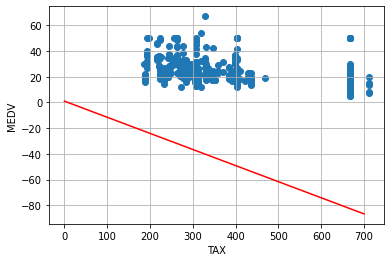

In [ ]:
numm=9
Xname=df.columns[numm]
Yname=df.columns[-1]
# Here is the data.
# How do I enforce a square grid in matplotlib? reference: https://stackoverflow.com/questions/50158333/how-do-i-enforce-a-square-grid-in-matplotlib
plt.grid()

# Add labels to the x- and y-axis.
plt.xlabel(Xname)
plt.ylabel(Yname)

# Data is plotted.
plt.scatter(df[Xname],df[Yname])

# Here is the hypothesis function a.k.a. prediction function.
xpoints = np.array([0, 700])
#ypoints = xpoints*coeffh[2]+h_i[1]

#for i in coeffh:
plt.plot(xpoints, xpoints*coeffh[numm]+h_i[1],color='red')

plt.show()

In [ ]:
'''
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

name00=df.columns[2]
name01=df.columns[1]

#def LinearRegression_Hypothesis():

def LineR_Evaluation(dX,dY,Vector):
  sigma =0
  for i in range(dY.shape[0]):
    sigma +=pow((dX*Vector[1]+Vector[0]-dY),2)
  return (1/(2*dY.shape[0]))*sigma

def LineR_DiffEvaluation(dX,dY,Vector):
  Coef_Dot = #... + Vector[1] * dX[dX.columns[0]] + Vector[1] * dX[dX.columns[0]] + Vector[0] - dY
  theDottt = 
  return [res.mean(),(res*dX[dX.columns[0]]).mean(),(res*dX[dX.columns[1]]).mean(),...]
  # reference: https://mccormickml.com/2014/03/04/gradient-descent-derivation/

def GradientDescent(dX,dY,Diff,LRate=0.008,Decay=0.0002,LastEpoch=10000, AcceptError=1e-10):
  epoch=0
  Vector=np.ones(len(dX.columns)+1)
  #Coef_Vect=np.ones(len(dX.columns))
  #Inte_Cons=1
  while epoch<LastEpoch or np.all(np.abs(Diff(dX,dY,Vector))<=AcceptError):
    Vector-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Vector))
    #print(Vector)
    #Coef_Vect-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Vector))
    #Inte_Cons-=LRate*pow((1-Decay),epoch)*np.array(Diff(dX,dY,Vector))
    # Slowly decrease learning rate.
    # reference: https://www.thoughtco.com/exponential-decay-definition-2312215
    epoch+=1
  return list(Vector)'''

'''
TrainX
TrainY
TesttX
TesttY
'''

h_i=GradientDescent(TrainX,TrainY,LineR_DiffEvaluation)
print(h_i)

NameError: ignored

**Compare the code**

In [ ]:
print(h_i)
# [31.51638752159319, -1.8172786483055543]

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
  
regr.fit(np.array(df[name00]).reshape(-1, 1), np.array(df[name01]).reshape(-1, 1))

print(regr.intercept_,regr.coef_[0])
# [31.51899535] [-1.8174491]

[31.51638752159319, -1.8172786483055543]
[31.51899535] [-1.8174491]


In [ ]:
def LineR_Evaluation(data,Vector):
  sigma =0
  for i in range(data[0].shape[0]):
    sigma +=pow((data[0].iloc[i]*Vector[1]+Vector[0]-data[1].iloc[i]),2)
  return (1/(2*data[0].shape[0]))*sigma

print(LineR_Evaluation([df[name00], df[name01]],h_i))
print(LineR_Evaluation([df[name00], df[name01]],[regr.intercept_,regr.coef_[0]]))

192.54900170718594
[192.54900078]


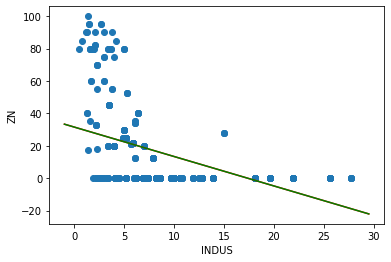

In [ ]:
plt.scatter(df[name00],df[name01])
xline=np.arange(-1, 30, 0.5)
plt.plot(xline,xline*h_i[1]+h_i[0],color='red')
plt.plot(xline,xline*regr.coef_[0]+regr.intercept_,color='green')
plt.xlabel(name00)
plt.ylabel(name01)
plt.show()

In [ ]:
print(h_i)

[21.033493057457676, -1.1321090702497214]


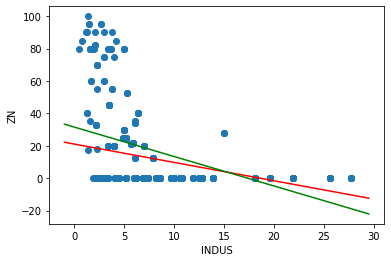

In [ ]:
plt.scatter(df[name00],df[name01])
xline=np.arange(-1, 30, 0.5)
plt.plot(xline,xline*h_i[1]+h_i[0],color='red')
plt.plot(xline,xline*(regr.coef_[0])+regr.intercept_,color='green')
plt.xlabel(name00)
plt.ylabel(name01)
plt.show()

In [ ]:
name00=df.columns[2]
name01=df.columns[1]
Ratio = 0.75
DataRatio = int(df.shape[0]*Ratio)
X_Train = df[[name00]].sample(frac = 1).iloc[:DataRatio,:]
Y_Train = df[[name01]].sample(frac = 1).iloc[:DataRatio,:]
X_Test  = df[[name00]].sample(frac = 1).iloc[DataRatio:,:]
Y_Test  = df[[name01]].sample(frac = 1).iloc[DataRatio:,:]